In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Data

In [2]:
datapath = ""

df = pd.read_csv(datapath + 'data.csv')

In [3]:
df.head()

,hPossesion,aPossesion,hshotsOnTarget,ashotsOnTarget,hshots,ashots,hfouls,afouls,hsaves,asaves,label
0,24,76,2,4,14,17,11,13,2,1,2
1,80,20,3,1,5,2,1,3,0,1,1
2,57,43,4,2,12,11,10,12,1,2,1
3,47,53,5,3,13,11,7,10,1,3,0
4,72,28,5,4,21,6,8,13,4,5,0


In [4]:
df.shape

(1272, 11)

# Convolutional Nueral Network

### Selected Data to Train

In [6]:
train, test = np.split(df.sample(frac=1, random_state=42), [int(0.8 * len(df))])

train.shape, test.shape

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


((1017, 11), (255, 11))

In [9]:
X = train.drop(columns=['label'])
y = train['label']

X_test = test.drop(columns=['label'])
y_test = test['label']

X.shape, y.shape

((1017, 10), (1017,))

# Model

In [49]:
model = models.Sequential()
model.add(layers.Conv1D(10, kernel_size=3, activation='relu', input_shape=(10, 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))  # Optional hidden layer
model.add(layers.Dense(3, activation='softmax'))  # Output layer for 3-class classification


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 8, 10)          │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 4, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,451 (5.67 KB)

 Trainable params: 1,451 (5.67 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Training

In [52]:
history = model.fit(X, y, epochs=32,
                    validation_data=(X_test, y_test))

Epoch 1/32


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3197 - loss: 4.3636 - val_accuracy: 0.4235 - val_loss: 1.2329
Epoch 2/32


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4605 - loss: 1.0899 - val_accuracy: 0.5333 - val_loss: 1.0080
Epoch 3/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5250 - loss: 0.9833 - val_accuracy: 0.5608 - val_loss: 0.9604
Epoch 4/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5172 - loss: 0.9421 - val_accuracy: 0.5686 - val_loss: 0.9370
Epoch 5/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5519 - loss: 0.9028 - val_accuracy: 0.5765 - val_loss: 0.9255
Epoch 6/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5360 - loss: 0.9390 - val_accuracy: 0.6118 - val_loss: 0.9030
Epoch 7/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6129 - loss: 0.8695 - val_accuracy: 0.6196 - val_loss: 0.8935
Epoch 8/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6173 - loss: 0.8726 - val_accuracy: 0.5961 - val_loss: 0.8901
Epoch 9/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6070 - loss: 0.8669 - val_accuracy: 0.6275 - val_loss: 0.8750
Epo

32/32 - 0s - 3ms/step - accuracy: 0.6382 - loss: 0.7885


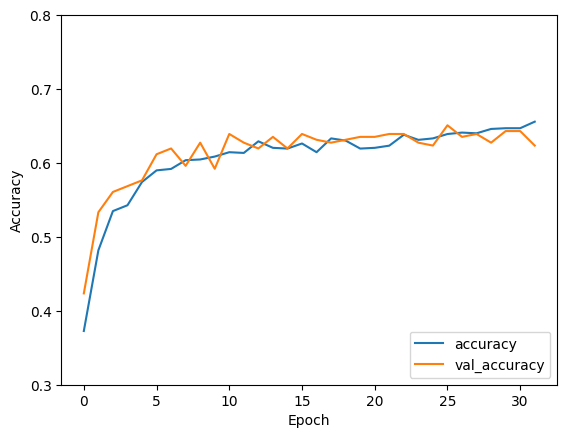

In [59]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 0.8])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X,  y, verbose=2)

In [60]:
print(test_acc)

0.6381514072418213


# inferrence

In [63]:
# Inter Milan
homeTeamName = "Inter Milan"
homeAveragePossesion = 56.5
homeAverageShots = 14.6
homeAverageShotsOnTarget = 4.9
homeAverageFouls = 10.8
homeAverageSaves = 5

# PSG
awayTeamName = "PSG"
awayAveragePossesion = 66.6
awayAverageShots = 18.8
awayAverageShotsOnTarget = 7.9
awayAverageFouls = 10
awayAverageSaves = 3

result_map = {
    0: "Draw",
    1: f"{homeTeamName} Win",
    2: f"{awayTeamName} Win"
}

X = np.array([[homeAveragePossesion, awayAveragePossesion, homeAverageShotsOnTarget, awayAverageShotsOnTarget, homeAverageShots, awayAverageShots, homeAverageFouls, awayAverageFouls, homeAverageSaves, awayAverageSaves]])
X = X.reshape((1, 10, 1))
y_prob = model.predict(X)
y_pred_class = np.argmax(y_prob, axis=1)
print(f"Predicted class: {y_pred_class[0]}")
print(f"Predicted result: {result_map[y_pred_class[0]]}")
print(f"Predicted probabilities: {[f'{p:.2f}' for p in y_prob[0]]}")
print(f'Model Accuracy: {test_acc:.2f}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class: 2
Predicted result: PSG Win
Predicted probabilities: ['0.27', '0.18', '0.56']
Model Accuracy: 0.64
